# 쇼핑몰 매출 예측

+ fbprophet을 통한 시계열예측
+ AutoRegressive 알고리즘을 통한 예측
+ Times Series : Supervised Learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
today = datetime.now()

In [5]:
today

datetime.datetime(2021, 6, 26, 20, 19, 25, 838416)

In [6]:
today.year

2021

In [7]:
today.hour

20

In [8]:
today.microsecond

838416

In [9]:
today + timedelta(days = 10)  # 1 month later

datetime.datetime(2021, 7, 6, 20, 19, 25, 838416)

In [10]:
today + timedelta(weeks = 3)  # 3 weeks later

datetime.datetime(2021, 7, 17, 20, 19, 25, 838416)

In [11]:
today + timedelta(months = 2)  # month는 불가

TypeError: 'months' is an invalid keyword argument for __new__()

1) 임의의 데이터 만들기

In [ ]:
data = pd.DataFrame({'date': ['11/1/2020', '11/2/2020', '11/3/2020'], 'value': [10, 20, 30]})

In [ ]:
data

In [ ]:
data.info()  # object type(string type)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

In [ ]:
data['date'].loc[0].year

In [ ]:
data['date'].loc[0].day

In [ ]:
data = pd.DataFrame({'date': ['11-1-2020 1:11:11', '11-2-2020 2:11:11', '11-3-2020 3:11:11'], 'value': [10, 20, 30]})

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

In [ ]:
data['date'].loc[0].day

In [ ]:
data['date'].loc[0].hour

In [ ]:
data['date'].loc[0].minute

In [ ]:
data['date'].loc[0].second

In [ ]:
data = pd.DataFrame({'date': ['10-11-10', '10-11-11', '10-11-12'], 'value': [10, 20, 30]})  # month-day-year

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data

In [ ]:
# 직접 format 지정
pd.to_datetime(data['date'], format = '%y-%m-%d')  # year-month-day

+ 데이터 포맷에 문제가 생긴경우

In [ ]:
data = pd.read_excel('./data/Superstore.xls')

In [ ]:
data.head()

In [ ]:
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data['gap'] = data['Ship Date'] - data['Order Date']

In [ ]:
data

+ Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = data[['Profit', 'gap']]
y = data['Sales']

In [ ]:
X

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

+ 1) 'days' 삭제후 int type

In [ ]:
X['gap'].iloc[0].days

In [ ]:
X['gap'] = X['gap'].apply(lambda x: x.days)

In [ ]:
X['gap']

In [ ]:
model.fit(X,y)

In [ ]:
model.predict(X)

+ 2) unixtime

In [ ]:
data = pd.read_excel('./data/Superstore.xls')
data.head()
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]
data

In [ ]:
pd.to_numeric(data['Order Date']) /10**9

In [ ]:
pd.set_option('display.float_format', lambda x: "%.0f" % x)  # unix time converter: 초단위로 계산

In [ ]:
data['Order Date'] = pd.to_numeric(data['Order Date']) /10**9  # delete micro seconds 
data['Ship Date'] = pd.to_numeric(data['Ship Date']) /10**9

In [ ]:
data['gap'] = data['Ship Date'] - data['Order Date']

In [ ]:
data

In [ ]:
X = data[['Profit', 'gap']]
y = data['Sales']

In [ ]:
model = LinearRegression()
model.fit(X,y)

In [ ]:
model.predict(X)

# Time Serises Prediction

In [12]:
data = pd.read_excel('./data/Superstore.xls', index_col = 0)  # Row ID를 index로

In [13]:
data.head()  # targer: Sales

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [15]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [17]:
data['Category'].value_counts()  # Funiture기준으로 filtering

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [18]:
data['Category'] == 'Furniture'

Row ID
1        True
2        True
3       False
4        True
5       False
        ...  
9990     True
9991     True
9992    False
9993    False
9994    False
Name: Category, Length: 9994, dtype: bool

In [19]:
data2 = data[data['Category'] == 'Furniture']  # Category == Funiture

In [20]:
data2.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [21]:
data2 = data[['Order Date', 'Sales']]

In [22]:
data2.head()

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
3,2016-06-12,14.6200
4,2015-10-11,957.5775
5,2015-10-11,22.3680


In [23]:
data2 = data2.sort_values('Order Date') # 오름차순

In [24]:
data2 = data2.groupby('Order Date').sum()

In [25]:
data2

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

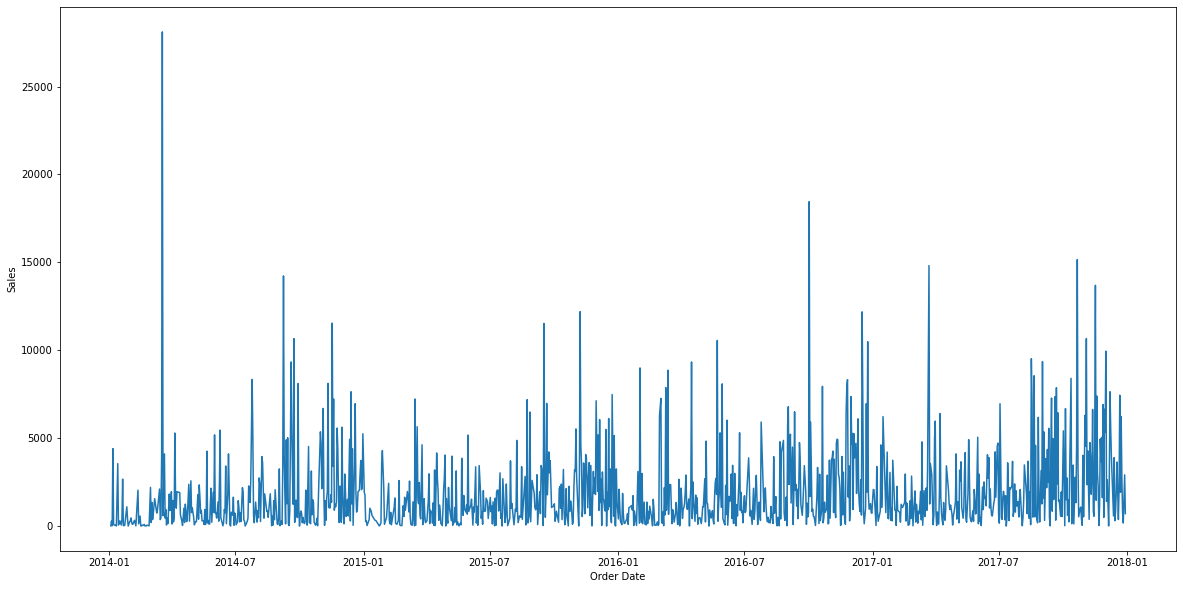

In [26]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data2.index, y = data2['Sales'])

<AxesSubplot:xlabel='Order Date'>

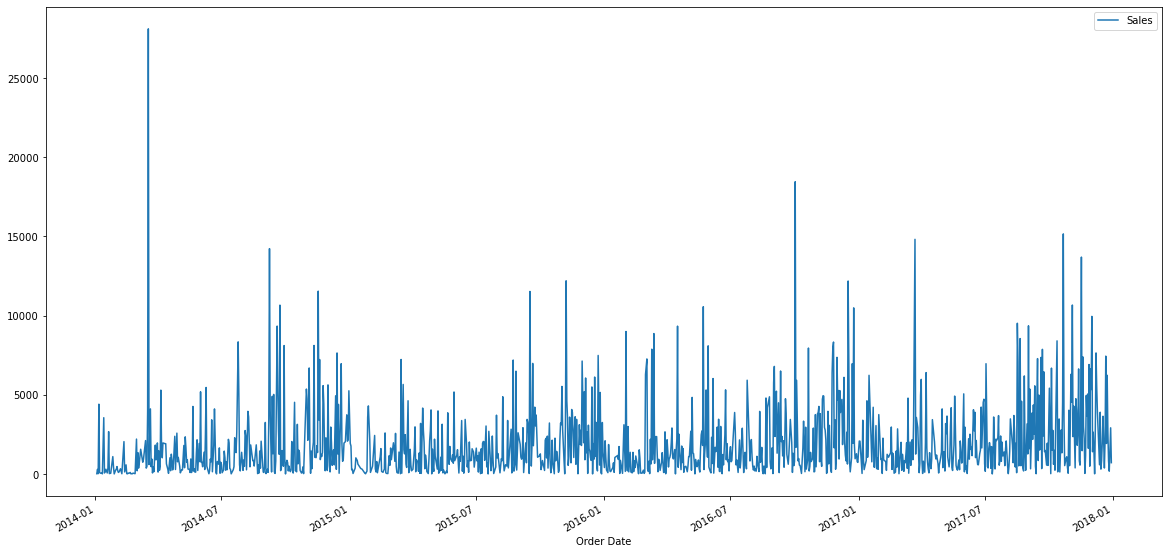

In [27]:
data2.plot(figsize = (20,10))

In [28]:
# date를 월단위로 묶어주기
data2 = data2.resample('MS').mean()

In [29]:
# date를 쿼터단위로 묶어주기
data2.resample('Q').mean()

,Sales
Order Date,
2014-03-31,1064.528300
2014-06-30,1135.786497
2014-09-30,1832.649078
2014-12-31,2093.235659
2015-03-31,1067.388758
2015-06-30,1203.648788
2015-09-30,1819.862949
2015-12-31,2139.501629
2016-03-31,1229.140641


In [30]:
# date를 week로 묶어주기
data2.resample('1W').mean()

,Sales
Order Date,
2014-01-05,647.131591
2014-01-12,NaN
2014-01-19,NaN
2014-01-26,NaN
2014-02-02,225.994600
...,...
2017-11-05,3948.260833
2017-11-12,NaN
2017-11-19,NaN


In [31]:
# date를 10일단위로 묶어주기
data2.resample('10D').mean()

,Sales
Order Date,
2014-01-01,647.131591
2014-01-11,NaN
2014-01-21,NaN
2014-01-31,225.994600
2014-02-10,NaN
...,...
2017-10-22,NaN
2017-11-01,3948.260833
2017-11-11,NaN


## 1) fbprophet사용

In [32]:
from fbprophet import Prophet

+ fbprophet의 형식으로 data 변환

In [41]:
df = data2.reset_index()

In [42]:
df.columns = ['ds', 'y']

In [44]:
df.head()

,ds,y
0,2014-01-01,647.131591
1,2014-02-01,225.994600
2,2014-03-01,2320.458708
3,2014-04-01,1178.972708
4,2014-05-01,844.581679


In [45]:
model = Prophet()

In [46]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = model.make_future_dataframe(periods = 12, freq = 'MS')  # 앞으로의 12개월을 예측

In [51]:
pred = model.predict(future)

In [53]:
pred_n = pred[['ds', 'yhat','yhat_lower', 'yhat_upper']]  # 예측값 범위

In [55]:
pred_n.head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,824.544648,492.668902,1165.661767
1,2014-02-01,295.404247,-30.524575,632.248341
2,2014-03-01,1630.017878,1304.445482,1968.501720
3,2014-04-01,1032.242227,665.311954,1365.782422
4,2014-05-01,924.196995,595.196586,1234.326889


+ plot으로 비교

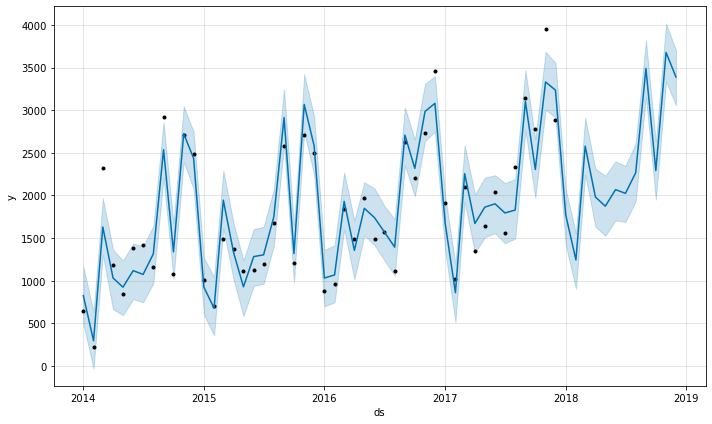

In [58]:
model.plot(pred)
plt.show()  # dot: observed, lines: predicted

+ train, test set split

In [59]:
data2

,Sales
Order Date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679
2014-06-01,1383.805104
2014-07-01,1414.433042
2014-08-01,1162.894521
2014-09-01,2920.619671


In [60]:
train = data2[:'2016']  # 22016년까지 data만 특정

In [62]:
train = train.reset_index()

In [64]:
train.columns = ['ds', 'y']

In [65]:
model = Prophet()

In [66]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future = model.make_future_dataframe(periods = 12, freq='MS')

In [70]:
pred = model.predict(future)

In [71]:
pred_n = pred[['ds', 'yhat']]

In [74]:
pred_n.set_index('ds', inplace = True)  # observed data인 data2와 같은 format으로 변형

In [78]:
pred_n = pred_n['2017':]  # 2017년이후 데이터 비교

<AxesSubplot:xlabel='ds'>

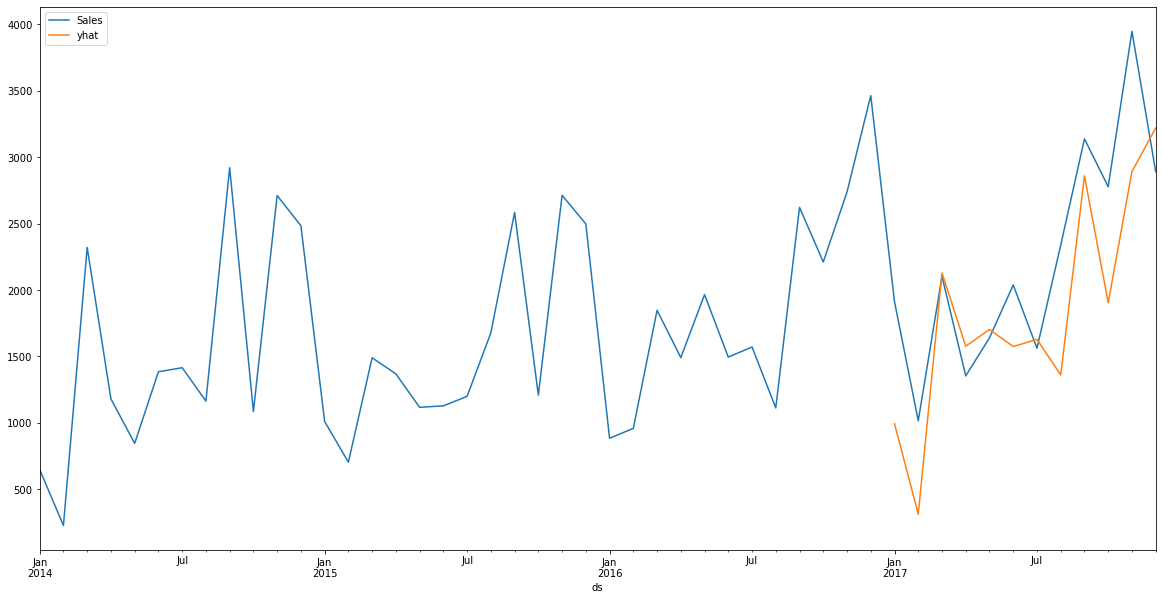

In [80]:
ax = data2.plot()
pred_n.plot(ax = ax, figsize = (20,10))  # ax plot위에 그려라


+) pred결과 

In [82]:
pred = model.predict(future)

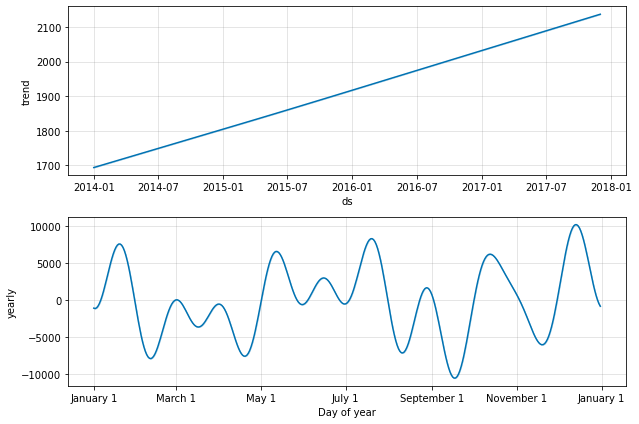

In [86]:
model.plot_components(pred)
plt.show()
# 증감
# seasonality존재?

## 2) AR model

In [88]:
data2

,Sales
Order Date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679
2014-06-01,1383.805104
2014-07-01,1414.433042
2014-08-01,1162.894521
2014-09-01,2920.619671


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [90]:
data = pd.read_excel('./data/Superstore.xls', index_col = 0)  # Row ID를 index로

In [91]:
data.head()  # targer: Sales

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [93]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [94]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [95]:
data['Category'].value_counts()  # Funiture기준으로 filtering

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [97]:
data2 = data[data['Category'] == 'Furniture']  # Category == Funiture

In [99]:
data2 = data[['Order Date', 'Sales']]

In [101]:
data2 = data2.sort_values('Order Date') # 오름차순

In [102]:
data2 = data2.groupby('Order Date').sum()

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

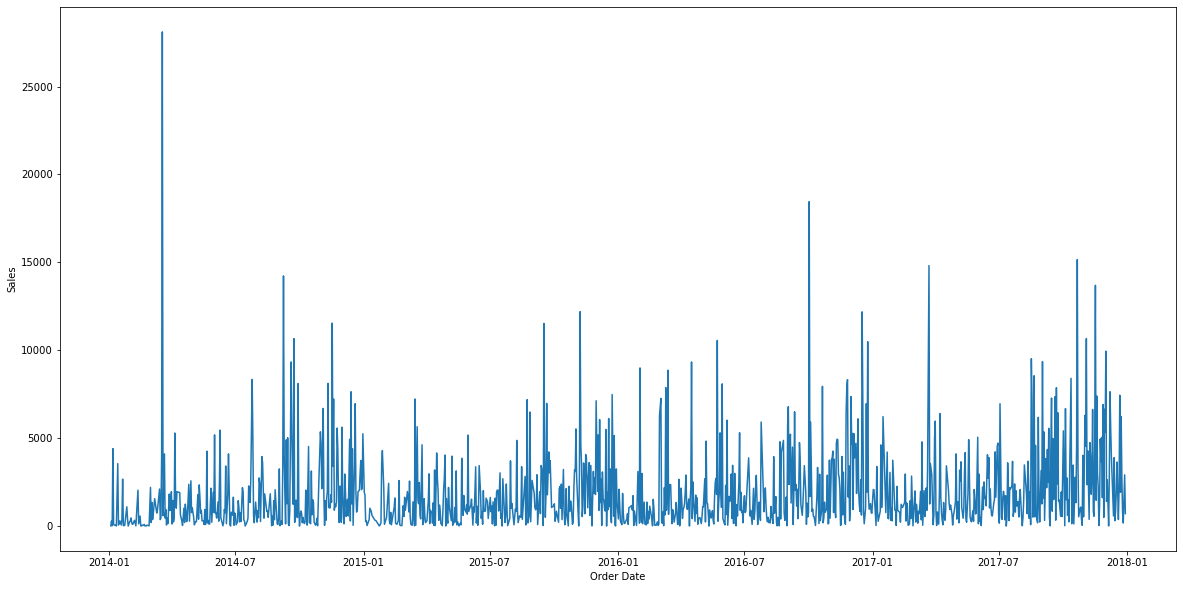

In [104]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data2.index, y = data2['Sales'])

<AxesSubplot:xlabel='Order Date'>

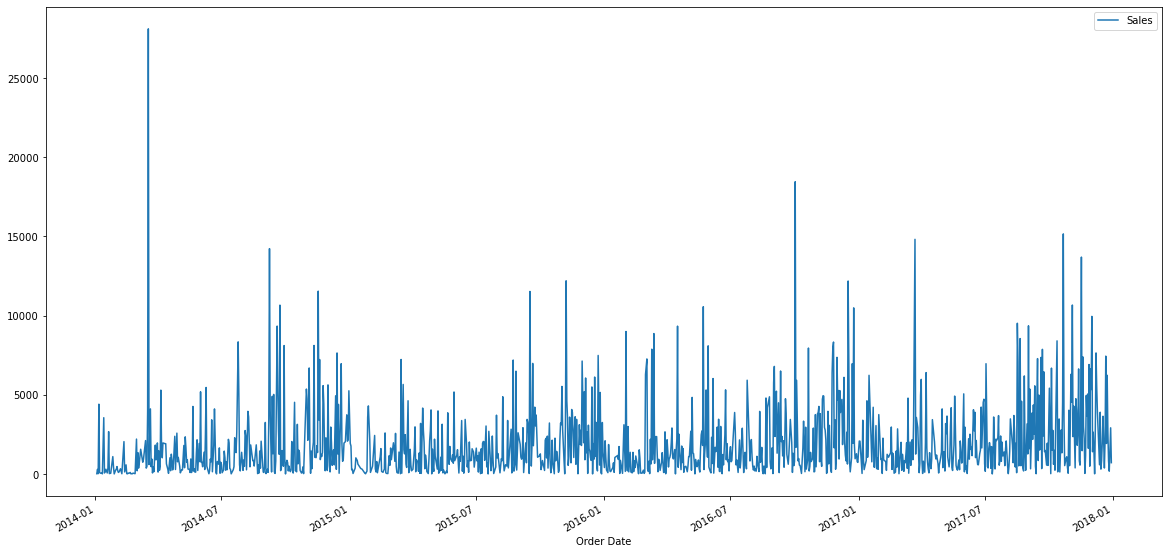

In [105]:
data2.plot(figsize = (20,10))

In [106]:
# date를 월단위로 묶어주기
data2 = data2.resample('MS').mean()

In [114]:
new_df = data2[:'2016']  # 2016년까지 데이터를 train set

In [115]:
from statsmodels.tsa.ar_model import AutoReg

In [118]:
model = AutoReg(new_df, lags = 12)  # 12개월의 data를 가지고 학습

In [120]:
model_fit = model.fit()

In [121]:
len(new_df)

36

In [123]:
pred = model_fit.predict(start = len(new_df), end = len(new_df) + 11)  # 36번째줄부터 47번째줄까지 predict

In [125]:
pred

2017-01-01    1652.703260
2017-02-01    1571.727377
2017-03-01    2369.689000
2017-04-01    2194.962366
2017-05-01    3089.839413
2017-06-01    2660.192810
2017-07-01    2641.676574
2017-08-01    2380.209320
2017-09-01    3402.103604
2017-10-01    3864.431771
2017-11-01    4397.381854
2017-12-01    5327.828390
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Order Date'>

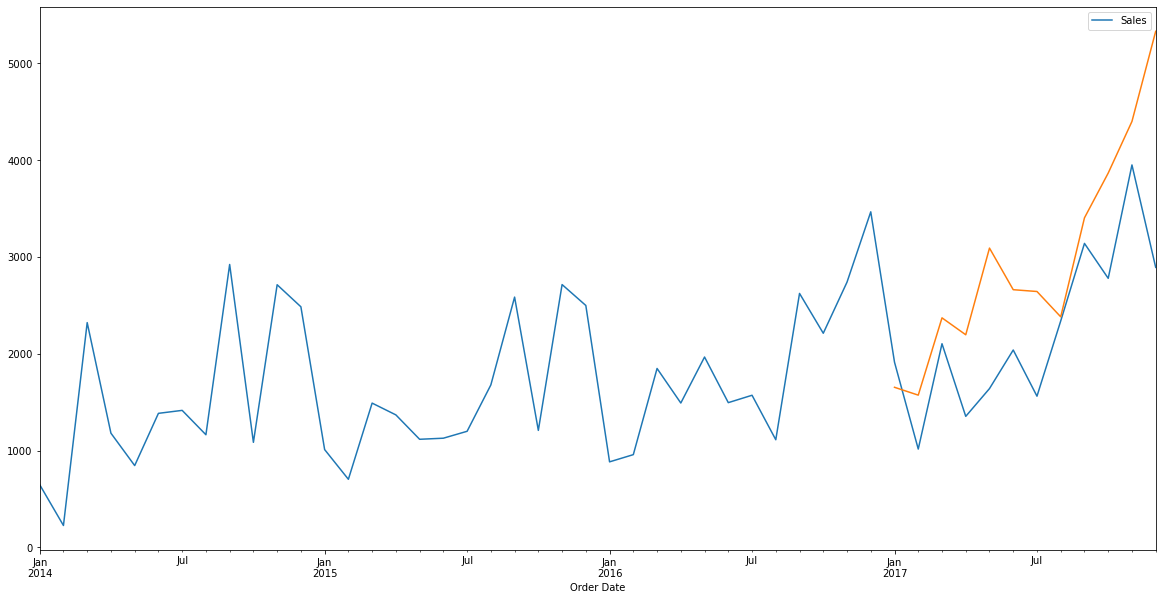

In [126]:
ax = data2.plot()
pred.plot(ax = ax, figsize = (20,10))

##  Time Series 구성요소
### 1. Trend
### 2. Seasonality
### 3. Cyclic
### 4. Irregularity

## AR(Auto Regressive) Model?

## Prophet을 위한 조건
### 1. 1년이상의 데이터
### 2. Seasonality
### 3. Event/Holiday
### 4. Historical Trend Change